Exercício 1 - Enunciado
1. Na análise de concessão de empréstimos, uma variável potencialmente
importante é a renda da pessoa. O gerente de um banco coleta uma base de
dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50
pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma
análise por meio de tabela de frequências. Neste sentido, pede-se:

a) Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000;
4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.

b) Em seguida, elabore a tabela de frequências para as faixas de renda acima.
O banco de dados está na planilha Lista de Exercício Complementares: aba
Exercício 1.


In [95]:
# importando dados
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, '..', 'Data'))
dados = pd.read_excel(os.path.join(data_path, 'Lista de Exercicios - Complementaresxlsx Portugues.xlsx'))
dados.head()

,Observação,Renda (R$),Unnamed: 2,Organizado,Unnamed: 4,Faixas de Renda,Frequência Absoluta,Frequência Relativa,Freq. Absoluta Acumulada,Freq. Relativa Acumulada
0,1,2894,NaN,1100,NaN,0-2.000,9.0,0.18,9.0,0.18
1,2,3448,NaN,1130,NaN,2.001-4.000,19.0,0.38,28.0,0.56
2,3,1461,NaN,1241,NaN,4.001-6.000,11.0,0.22,39.0,0.78
3,4,2224,NaN,1461,NaN,6.001-8.000,5.0,0.10,44.0,0.88
4,5,2501,NaN,1500,NaN,8.001-10.000,4.0,0.08,48.0,0.96


In [96]:
# Criando um data frame para resolução
resolucao = pd.DataFrame()

In [97]:
# Coletando os dados
resolucao['Renda R$'] = dados['Renda (R$)']
resolucao['Renda R$'].astype(float).head()

0    2894.0
1    3448.0
2    1461.0
3    2224.0
4    2501.0
Name: Renda R$, dtype: float64

In [98]:
# Definindo os limites e rótulos das faixas de renda
bins = [0, 2000, 4000, 6000, 8000, 10000, 12000]
labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000']


In [99]:
# Criando a coluna categorica e classificando os dados de acordo com a faixa de renda.
resolucao['Faixa de Renda'] = pd.cut(
    resolucao['Renda R$'],
    bins = bins,
    labels = labels,
    include_lowest = True
)
resolucao.head()

,Renda R$,Faixa de Renda
0,2894,2001-4000
1,3448,2001-4000
2,1461,0-2000
3,2224,2001-4000
4,2501,2001-4000


In [100]:
# Frequência absoluta
frequencia_absoluta = resolucao['Faixa de Renda'].value_counts().sort_index()
print(f"Frequência absoluta\n{frequencia_absoluta}")

Frequência absoluta
0-2000          9
2001-4000      19
4001-6000      11
6001-8000       5
8001-10000      4
10001-12000     2
Name: Faixa de Renda, dtype: int64


In [101]:
# Frequência relativa
frequencia_relativa = resolucao['Faixa de Renda'].value_counts(normalize=True).sort_index()*100
print(f'Frequência relativa:\n{frequencia_relativa}')

Frequência relativa:
0-2000         18.0
2001-4000      38.0
4001-6000      22.0
6001-8000      10.0
8001-10000      8.0
10001-12000     4.0
Name: Faixa de Renda, dtype: float64


In [102]:
# Frequência absoluta acumulada
frequencia_absoluta_acumulada = frequencia_absoluta.cumsum()
print(f'Frequência absoluta acumulada:\n{frequencia_absoluta_acumulada}')

Frequência absoluta acumulada:
0-2000          9
2001-4000      28
4001-6000      39
6001-8000      44
8001-10000     48
10001-12000    50
Name: Faixa de Renda, dtype: int64


In [103]:
# Frequência relativav acumulada
frequencia_relativa_acumulada = frequencia_relativa.cumsum()
print(f'Frequência relativa acumulada:\n{frequencia_relativa_acumulada}')

Frequência relativa acumulada:
0-2000          18.0
2001-4000       56.0
4001-6000       78.0
6001-8000       88.0
8001-10000      96.0
10001-12000    100.0
Name: Faixa de Renda, dtype: float64


In [104]:
frequencias = pd.DataFrame({
    'Frequência Absoluta': frequencia_absoluta,
    'Frequência Relativa': frequencia_relativa,
    'Frequência absoluta acumulada': frequencia_absoluta_acumulada,
    'Frequência relativa acumulada (%)': frequencia_relativa_acumulada
}).rename_axis('Faixa de Renda')
frequencias

,Frequência Absoluta,Frequência Relativa,Frequência absoluta acumulada,Frequência relativa acumulada (%)
Faixa de Renda,,,,
0-2000,9,18.0,9,18.0
2001-4000,19,38.0,28,56.0
4001-6000,11,22.0,39,78.0
6001-8000,5,10.0,44,88.0
8001-10000,4,8.0,48,96.0
10001-12000,2,4.0,50,100.0


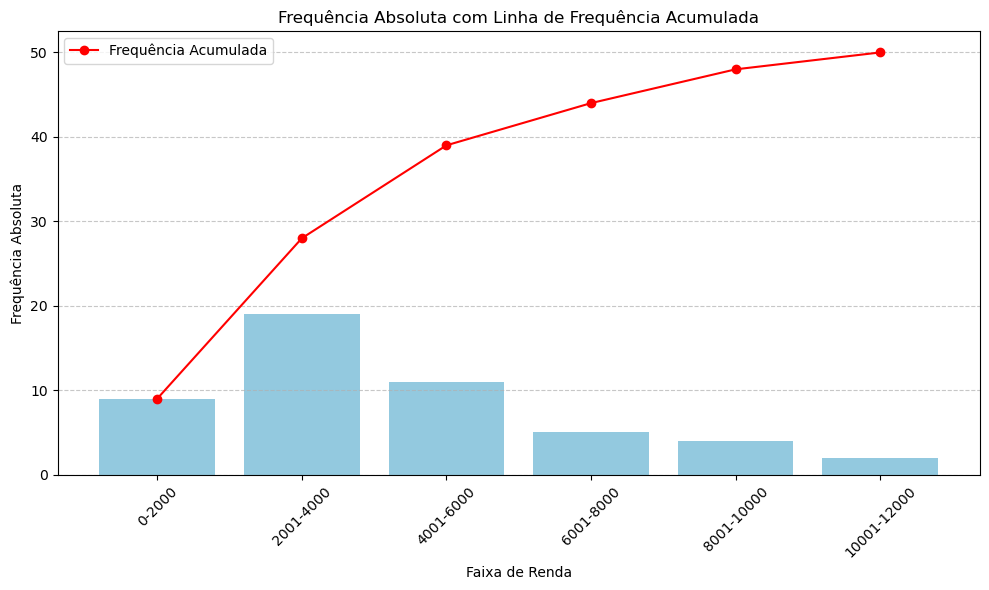

In [105]:
# Garante que os índices estejam no formato string (rótulos do eixo x)
frequencias = frequencias.reset_index()

plt.figure(figsize=(10, 6))

# Gráfico de colunas com seaborn (frequência absoluta)
sns.barplot(
    x='Faixa de Renda',
    y='Frequência Absoluta',
    data=frequencias,
    color='skyblue'
)

# Linha acumulada com matplotlib
plt.plot(
    frequencias['Faixa de Renda'],
    frequencias['Frequência absoluta acumulada'],
    color='red',
    marker='o',
    label='Frequência Acumulada'
)

# Rótulos e ajustes
plt.title('Frequência Absoluta com Linha de Frequência Acumulada')
plt.xlabel('Faixa de Renda')
plt.ylabel('Frequência Absoluta')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


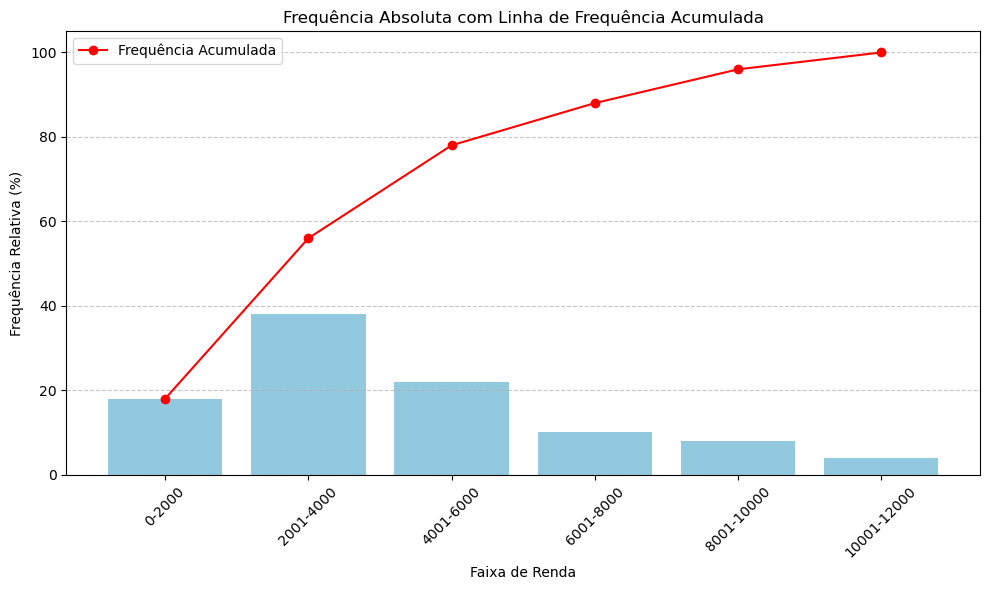

In [107]:
# Garante que os índices estejam no formato string (rótulos do eixo x)
frequencias = frequencias.reset_index()

plt.figure(figsize=(10, 6))

# Gráfico de colunas com seaborn (frequência absoluta)
sns.barplot(
    x='Faixa de Renda',
    y='Frequência Relativa',
    data=frequencias,
    color='skyblue'
)

# Linha acumulada com matplotlib
plt.plot(
    frequencias['Faixa de Renda'],
    frequencias['Frequência relativa acumulada (%)'],
    color='red',
    marker='o',
    label='Frequência Acumulada'
)

# Rótulos e ajustes
plt.title('Frequência Absoluta com Linha de Frequência Acumulada')
plt.xlabel('Faixa de Renda')
plt.ylabel('Frequência Relativa (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()